In [5]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as subplots

from preprocessing.transformers import make_empty_values_filler_pipeline

In [6]:
shares = pd.read_csv("../shares.csv")
etfs = pd.read_csv("../etfs.csv")
bonds = pd.read_csv("../bonds.csv")
currencies = pd.read_csv("../currencies.csv")

In [7]:
shares_cat_columns = shares.dtypes[shares.dtypes == "object"].index.tolist()
shares_num_columns = shares.dtypes[shares.dtypes != "object"].index.tolist()

etfs_cat_columns = etfs.dtypes[etfs.dtypes == "object"].index.tolist()
etfs_num_columns = etfs.dtypes[etfs.dtypes != "object"].index.tolist()

bonds_cat_columns = bonds.dtypes[bonds.dtypes == "object"].index.tolist()
bonds_num_columns = bonds.dtypes[bonds.dtypes != "object"].index.tolist()

In [8]:
shares_nan_filler = make_empty_values_filler_pipeline(
    num_columns=shares_num_columns,
    cat_columns=shares_cat_columns
)
bonds_nan_filler = make_empty_values_filler_pipeline(
    num_columns=bonds_num_columns,
    cat_columns=bonds_cat_columns
)
etfs_nan_filler = make_empty_values_filler_pipeline(
    num_columns=etfs_num_columns,
    cat_columns=etfs_cat_columns
)

In [9]:
filled_bonds = bonds_nan_filler.fit_transform(bonds)
filled_bonds = pd.DataFrame(filled_bonds, columns=(bonds_num_columns + bonds_cat_columns))

filled_etfs = etfs_nan_filler.fit_transform(etfs)
filled_etfs = pd.DataFrame(filled_etfs, columns=(etfs_num_columns + etfs_cat_columns))

filled_shares = shares_nan_filler.fit_transform(shares)
filled_shares = pd.DataFrame(filled_shares, columns=(shares_num_columns + shares_cat_columns))

In [10]:
import warnings

warnings.filterwarnings("ignore")

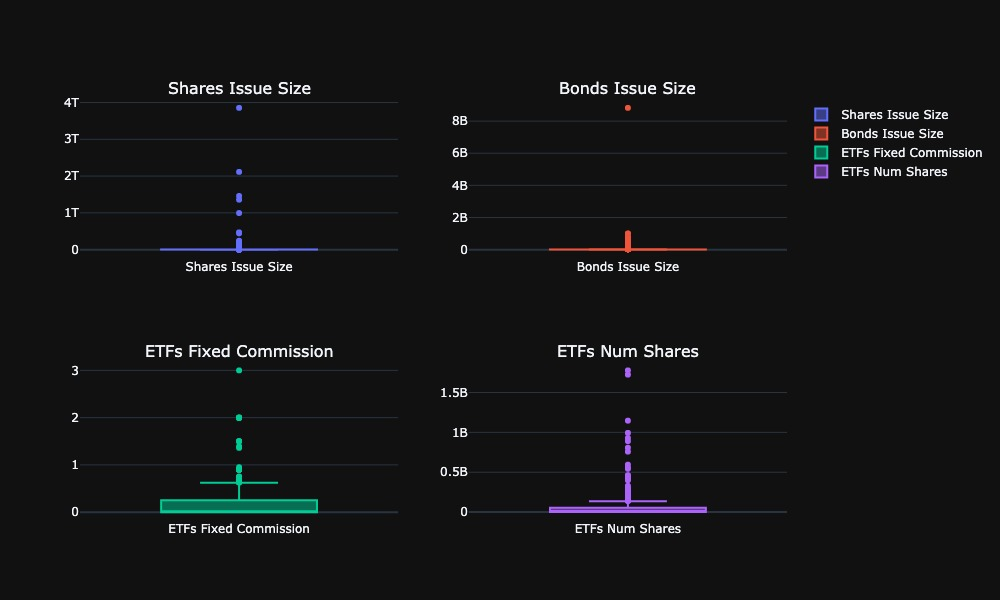

In [23]:
subplot = subplots.make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Shares Issue Size",
        "Bonds Issue Size",
        "ETFs Fixed Commission",
        "ETFs Num Shares"
    )
)
subplot.add_trace(
    go.Box(y=filled_shares.issue_size, name="Shares Issue Size"),
    row=1, col=1
)
subplot.add_trace(
    go.Box(y=filled_bonds.issue_size, name="Bonds Issue Size"),
    row=1, col=2
)
subplot.add_trace(
    go.Box(y=filled_etfs.fixed_commission, name="ETFs Fixed Commission"),
    row=2, col=1
)
subplot.add_trace(
    go.Box(y=filled_etfs.num_shares, name="ETFs Num Shares"),
    row=2, col=2
)
subplot.show("jpg", width=1000, height=600)


In [39]:
from matplotlib.cbook import boxplot_stats


def remove_outliers(df, columns):
    for column in columns:
        outliers = boxplot_stats(df[column]).pop(0)['fliers']
        df = df[~df[column].isin(outliers)]
    return df

In [40]:
processed_bonds = remove_outliers(filled_bonds, ("issue_size",))
processed_etfs = remove_outliers(filled_etfs, ("fixed_commission", "num_shares"))
processed_shares = remove_outliers(filled_shares, ("issue_size",))

In [41]:
print(
    "Bonds Shapes DIff: {} ({:.2f}%) (from: {}, to: {})".format(
        filled_bonds.shape[0] - processed_bonds.shape[0],
        100 - processed_bonds.shape[0] / filled_bonds.shape[0] * 100,
        filled_bonds.shape[0], processed_bonds.shape[0]
    )
)
print(
    "ETFs Shapes DIff: {} ({:.2f}%)  (from: {}, to: {})".format(
        filled_etfs.shape[0] - processed_etfs.shape[0],
        100 - processed_etfs.shape[0] / filled_etfs.shape[0] * 100,
        filled_etfs.shape[0], processed_etfs.shape[0]
    )
)
print(
    "Shares Shapes DIff: {} ({:.2f}%)  (from: {}, to: {})".format(
        filled_shares.shape[0] - processed_shares.shape[0],
        100 - processed_shares.shape[0] / filled_shares.shape[0] * 100,
        filled_shares.shape[0], processed_shares.shape[0]
    )
)


Bonds Shapes DIff: 133 (11.67%) (from: 1140, to: 1007)
ETFs Shapes DIff: 70 (25.93%)  (from: 270, to: 200)
Shares Shapes DIff: 297 (14.98%)  (from: 1983, to: 1686)


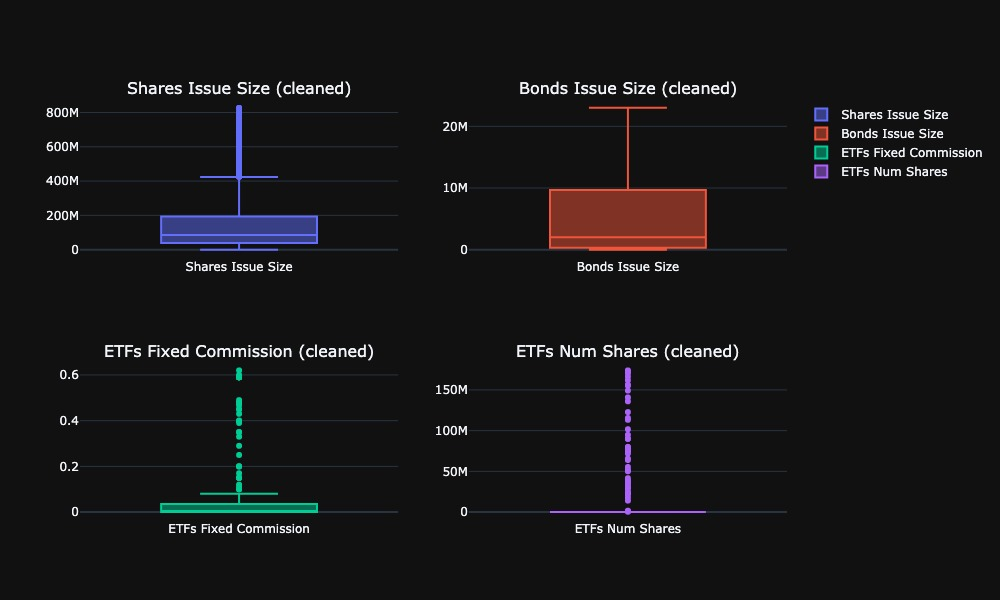

In [50]:
subplot = subplots.make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Shares Issue Size (cleaned)",
        "Bonds Issue Size (cleaned)",
        "ETFs Fixed Commission (cleaned)",
        "ETFs Num Shares (cleaned)"
    )
)
subplot.add_trace(
    go.Box(
        y=processed_shares.issue_size,
        name="Shares Issue Size",
        quartilemethod="linear"
    ),
    row=1, col=1
)
subplot.add_trace(
    go.Box(
        y=processed_bonds.issue_size,
        name="Bonds Issue Size",
        quartilemethod="linear"
    ),
    row=1, col=2
)
subplot.add_trace(
    go.Box(
        y=processed_etfs.fixed_commission,
        name="ETFs Fixed Commission",
        quartilemethod="linear"
    ),
    row=2, col=1
)
subplot.add_trace(
    go.Box(
        y=processed_etfs.num_shares,
        name="ETFs Num Shares",
        quartilemethod="linear"
    ),
    row=2, col=2
)
subplot.show("jpg", width=1000, height=600)
